# Upper Confidence Bound (UCB)

## Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [16]:
#dataset is simulation, its like we know which ads would be clicked on, in reality we would not, and we would only show 1 add at a time and determine from that
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')




## Implementing UCB

In [ ]:
import math
from collections import namedtuple
from numpy.typing import ArrayLike
from typing import Optional

upper_confidence_bound_results = namedtuple('upper_confidence_bound_results', ['ads_selected','results_per_ad'])


def calculate_upper_bound(total_reward: int, times_selected: int, current_time: int) -> float:
    """
    Calculate the upper bound for the UCB algorithm.
    Args:
        total_reward (int): total reward of the ad
        times_selected (int): number of times the ad was selected

    Returns:
        float: upper bound value
    """
    if times_selected == 0:
        raise ValueError("times_selected cannot be zero")
    
    average_reward = total_reward / times_selected
    delta_i = math.sqrt(3/2 * math.log(current_time) / times_selected)
    return average_reward + delta_i



def UCB(data: ArrayLike, beginning_upper_bound: float = 1E400)-> upper_confidence_bound_results:
    """
    Upper Confidence Bound (UCB) algorithm for multi-armed bandit problem.
    Args:
        data (ArrayLike[ArrayLike[np.float64]]): the dataset of ads
        begining_upper_bound (float, optional): the median of confidence. Defaults to 1E400.

    Returns:
        namedtuple[list[int], dict[int: [int, int]]]: ads_selected, results_per_ad
        ads_selected (list[int]): list of ads selected
        results_per_ad (dict[int: [int, int]]): dictionary to store information about the ads, for values, first index is number of times selcted, second index is total reward
    """
   

    NUM_ADS = data.shape[1]
    NUM_ROWS = data.shape[0]

    ads_selected = [] # list to store the ads selected

    # dictionary to store information about the ads, for values, first index is number of times selcted, second index is total reward
    ads_info = {i: [0,0] for i in range(NUM_ADS)}
    ads_upper_bound = {i: beginning_upper_bound for i in range(NUM_ADS)}
    

    for n in range(1, NUM_ROWS + 1):
        current_add = max(ads_upper_bound, key=ads_upper_bound.get)
        ads_selected.append(current_add)
        ads_info[current_add][0] += 1
        ads_info[current_add][1] += data[n-1, current_add]
        ads_upper_bound[current_add] = calculate_upper_bound(ads_info[current_add][1], ads_info[current_add][0], n)


    return upper_confidence_bound_results(ads_selected, ads_info)


In [18]:
results = UCB(dataset.values)
ads_selected = results.ads_selected

## Visualising the results

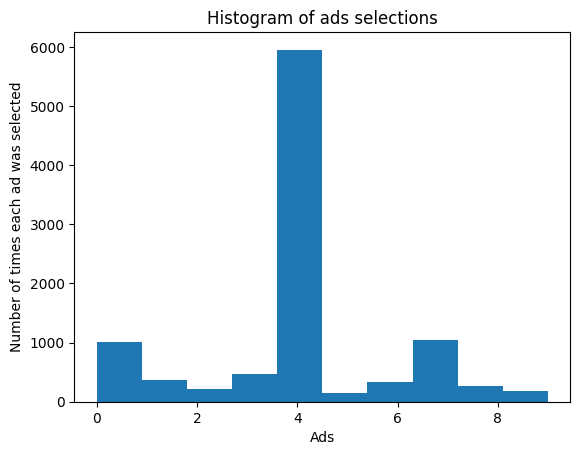

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

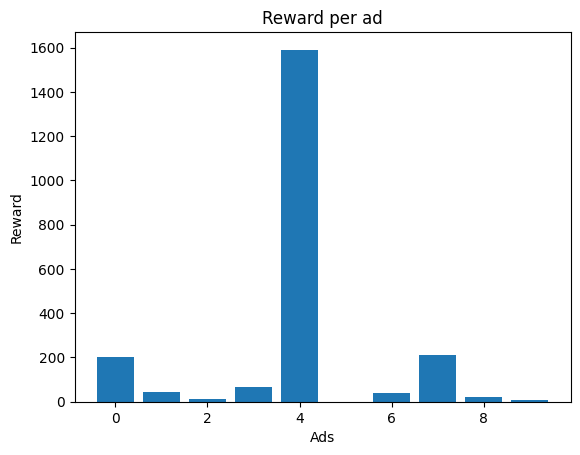

In [27]:
results_dict = results.results_per_ad
rewards_per_ad = list(map(lambda x: x[1][1], sorted(results_dict.items(), key = lambda x: x[0])))


plt.bar([i for i in range(len(rewards_per_ad))], rewards_per_ad)
plt.title('Reward per ad')
plt.xlabel('Ads')
plt.ylabel('Reward')
plt.show()